In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import np_utils
import os
import numpy as np
import cv2
import dlib

D:\Program\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
import dlib
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import imutils
from imutils.face_utils import *
import os
from os import listdir
import pickle
import pandas as pd
import sys
%matplotlib inline

In [13]:
#讀取評分數據
rating_dict={}
with open('./beauty_detector/All_labels.txt','rb') as label:
    datalines = label.readlines()
    for d in datalines:
        d = str(d).replace('b','').replace('\\n','').replace("'","").split(' ')
        rating_dict[d[0]] = float(d[1])
        

def get_face(img):
    #產生臉部識別
    face_rects = detector(img, 1)
    for i, d in enumerate(face_rects):
        #讀取框左上右下座標
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        #根據此座標範圍讀取臉部特徵點
        shape = landmark_predictor(img, d)
        #將特徵點轉為numpy
        shape = shape_to_np(shape)# (68,2)    
        # 透過dlib挖取臉孔部分，將臉孔圖片縮放至256*256的大小，並存放於pickle檔中
        # 人臉圖像部分呢。很簡單，只要根據畫框的位置切取即可crop_img = img[y1:y2, x1:x2, :]
        crop_img = img[y1:y2, x1:x2, :] 
        crop_img = cv2.resize(crop_img, (128, 128))         
        return crop_img   
    
    
face_cascade = cv2.CascadeClassifier('./beauty_detector/haarcascade_frontalface_default.xml')
 
def detect_haar(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,
                                          scaleFactor=1.1,
                                          minNeighbors=3,)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    
    print(faces)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
['CF243.jpg', 'AF1330.jpg', 'CF726.jpg', 'CF15.jpg', 'AF722.jpg', 'AF1678.jpg', 'CM233.jpg', 'CF333.jpg', 'AM59.jpg', 'AF849.jpg', 'AF1053.jpg', 'CF427.jpg', 'M369.jpg', 'AF1935.jpg', 'AM312.jpg', 'AF1479.jpg', 'CM668.jpg']


[[ 49  80 245 245]]


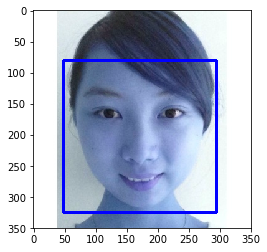

In [16]:
global detector ,landmark_predictor
#宣告臉部偵測器，以及載入預訓練的臉部特徵點模型
detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor('./beauty_detector/shape_predictor_5_face_landmarks.dat')

img = cv2.imread('./beauty_detector/AF1053.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# face = get_face(img)     

face = detect_haar(img)
face